# Graphs and NetworkX

A graph is a data structure consisting of nodes (entities), and edges (relationships) which connect certain nodes to each other. Edges may have costs associated with them. NetworkX is a library that allows for computation over graphs.

NetworkX graph types you’ll use most:

- nx.Graph() → undirected - Edge from A to B is the same as edge from B to A.

- Not for this assignment: nx.DiGraph() → directed - Edge from A to B does not imply an edge from B to A.

You can see a full tutorial here: https://networkx.org/documentation/stable/tutorial.html

For this assignment, we will use the Graph class in graph.py; this lets you track additional information about your graph search.

In [1]:
import networkx as nx
from graph_wrapper import Graph
import matplotlib.pyplot as plt
import math

%load_ext autoreload
%autoreload 2


## Example undirected friend graph
Alice is friends with Bob, Bob is friends with Carol. Damian has no friends.

In [2]:
G = Graph()

G.add_node("Alice")
G.add_node("Bob")
G.add_node("Carol")
G.add_node("Damian")

# Alice is friends with Bob, Bob is friends with Carol. Damian has no friends.
G.add_edge("Alice", "Bob")
G.add_edge("Bob", "Carol")

print(G.nodes())
print(G.edges())

['Alice', 'Bob', 'Carol', 'Damian']
[('Alice', 'Bob'), ('Bob', 'Carol')]


## Get node neighbors

I wrap the neighbors in list to make printing nice; but you can loop through without casting to list.

In [3]:
print(list(G.neighbors("Alice")))
print(list(G.neighbors("Bob")))
print(list(G.neighbors("Damian")))

['Bob']
['Alice', 'Carol']
[]


## Connected components -> Components which have connections to each other.
Don't need this for the assignment but it's kind of cool


In [4]:
components = list(nx.connected_components(G))
print(components)

[{'Bob', 'Alice', 'Carol'}, {'Damian'}]


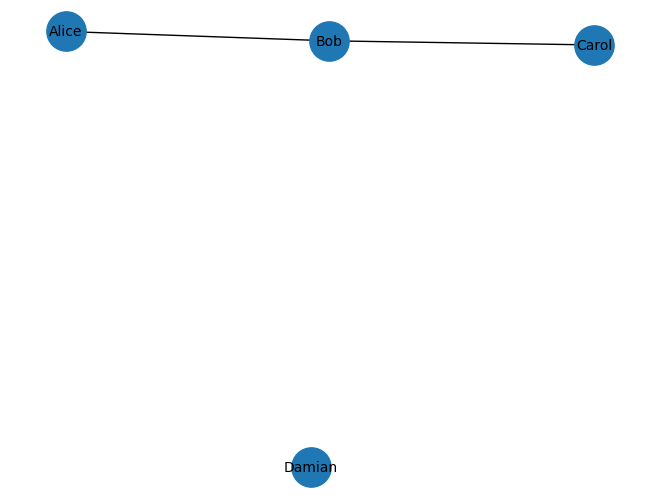

In [5]:
# You can draw NetworkX graphs using the matplotlib library
pos = nx.spring_layout(G)  # Options for layouts: https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=800,
    font_size=10
)
plt.show()

# Graph with weights:

For this example, let's make a simple Manhattan-like grid, where the coordinates for each landmark are the (avenue, street). The edge weights will be the "manhattan" distance between the two connected landmarks: `|x2 - x1| + |y2 - y1|`. 

If you want to see how it is made, check premade_graphs.py

In [6]:
from premade_graphs import basic_manhattan

manhattan_graph = basic_manhattan()

Basic Info

In [7]:
print("Nodes:", manhattan_graph.number_of_nodes())
print("Edges:", manhattan_graph.number_of_edges())

Nodes: 14
Edges: 17


Metadata for each node

In [8]:
print("Nodes:", manhattan_graph.nodes(data=True))

print("Edges:", manhattan_graph.edges(data=True))


Nodes: [('Times Square', {'pos': (7, 42)}), ('Grand Central', {'pos': (3, 42)}), ('Empire State', {'pos': (5, 34)}), ('Rockefeller Center', {'pos': (5, 50)}), ('Central Park South', {'pos': (6, 59)}), ('Columbus Circle', {'pos': (8, 59)}), ('Washington Sq Park', {'pos': (5, 8)}), ('Union Square', {'pos': (4, 14)}), ('Wall Street', {'pos': (4, 0)}), ('Brooklyn Bridge', {'pos': (1, 1)}), ('Bryant Park', {'pos': (6, 42)}), ('Herald Square', {'pos': (6, 34)}), ('Chelsea (23rd St)', {'pos': (6, 23)}), ('Pace', {'pos': (3, 1)})]
Edges: [('Times Square', 'Bryant Park', {'weight': 1}), ('Times Square', 'Rockefeller Center', {'weight': 10}), ('Times Square', 'Herald Square', {'weight': 9}), ('Grand Central', 'Bryant Park', {'weight': 3}), ('Empire State', 'Herald Square', {'weight': 1}), ('Rockefeller Center', 'Bryant Park', {'weight': 9}), ('Rockefeller Center', 'Central Park South', {'weight': 10}), ('Central Park South', 'Columbus Circle', {'weight': 2}), ('Washington Sq Park', 'Union Square

## Plot of this graph 
If you want to see how it is plotted, see utils.py

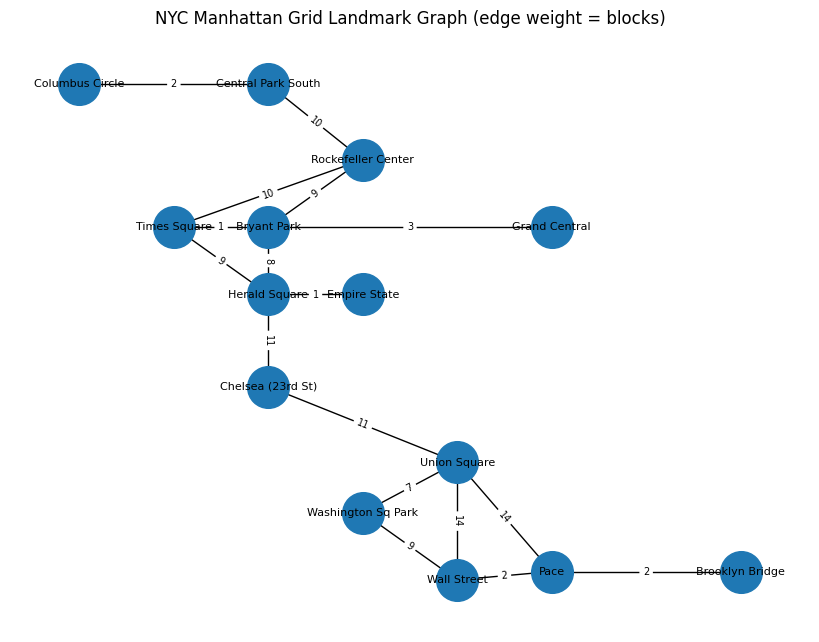

In [12]:
from utils import draw_manhattan_graph

draw_manhattan_graph(manhattan_graph, title="NYC Manhattan Grid Landmark Graph (edge weight = blocks)")

## Examples of things to request

In [13]:
# All neighbors of Union Square
print(list(manhattan_graph.neighbors("Union Square")))

# Get edge weight from Union Square to Chelsea
print(manhattan_graph["Union Square"]["Chelsea (23rd St)"]["weight"])

# Full attributes with Union Square node
print(manhattan_graph["Union Square"])

# Union Square position - works because this graph was given x, y coordinates
print(manhattan_graph.nodes["Union Square"]["pos"])


['Chelsea (23rd St)', 'Washington Sq Park', 'Wall Street', 'Pace']
11
{'Chelsea (23rd St)': {'weight': 11}, 'Washington Sq Park': {'weight': 7}, 'Wall Street': {'weight': 14}, 'Pace': {'weight': 14}}
(4, 14)


## Sample BFS function. Is that the best path though?

In [14]:
def bfs(graph, start, goal, verbose=False):
    graph.reset_tracking()  # For tracking purposes
    
    # queue & previous path to get there
    queue = [
        (start, [start])
    ]

    while queue:  # While queue still has something to check
        cur_label, cur_path = queue.pop(0)  # Pop from end of queue for DFS
        # TODO: Avoid cycles
        if verbose: print(f"Checking {cur_label}, path={cur_path}")
        if cur_label == goal:
            return cur_path
    
        # Add neighbors to queue
        neighbors = graph.neighbors(cur_label)
        for neighbor in neighbors:
            queue.append(
                (neighbor, cur_path + [neighbor])
            )
        if verbose:
            print("Queue: ",  [x[0] for x in queue])
            print("-----")
    if verbose: print("No path found")
    return []

## BFS from Pace to Times Square

Turn verbose=True if you want to trace it

In [19]:
path = bfs(manhattan_graph, "Pace", "Times Square", verbose=False)
cost = nx.path_weight(manhattan_graph, path, weight="weight")
print("Returned path length", len(path))
print("Returned path cost: ", cost)

Returned path length 5
Returned path cost:  45


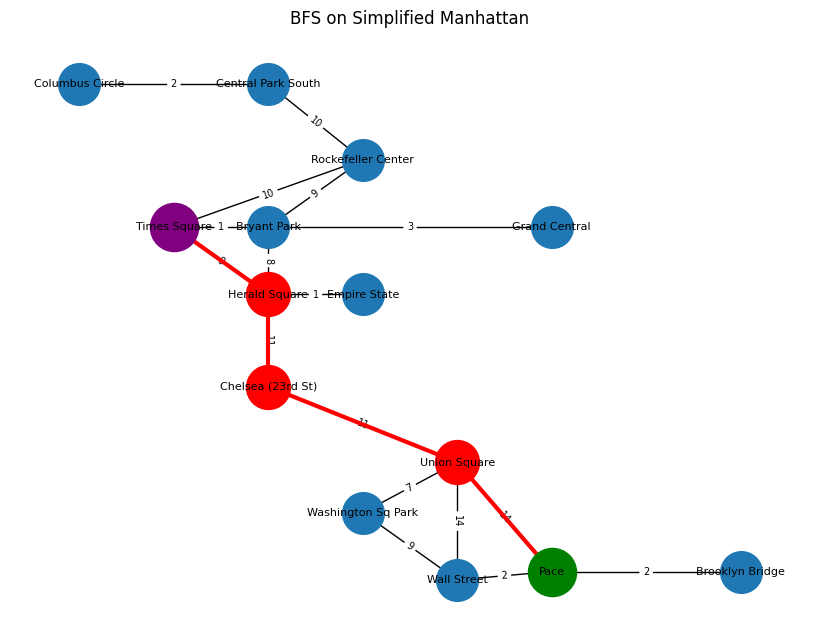

In [20]:
# Graphed out
draw_manhattan_graph(manhattan_graph, path=path, title="BFS on Simplified Manhattan")

In [17]:
# With the Graph class I implemented, you can see statistics about your graph search
import pprint
pprint.pp(manhattan_graph.stats())

{'total_explorations': 68,
 'unique_explored': 8,
 'reexpansions': 7,
 'goal_expanded': False,
 'exploration_order': ['Pace',
                       'Brooklyn Bridge',
                       'Wall Street',
                       'Union Square',
                       'Pace',
                       'Union Square',
                       'Washington Sq Park',
                       'Pace',
                       'Chelsea (23rd St)',
                       'Washington Sq Park',
                       'Wall Street',
                       'Pace',
                       'Brooklyn Bridge',
                       'Wall Street',
                       'Union Square',
                       'Chelsea (23rd St)',
                       'Washington Sq Park',
                       'Wall Street',
                       'Pace',
                       'Union Square',
                       'Wall Street',
                       'Brooklyn Bridge',
                       'Wall Street',
                 

This is obviously duplicating a lot of work. Try adding detection for duplicates and see if that helps reduce the search space while also keeping the same path length.

And I'm sure you know by now, but this is not the most optimal path when considering edge costs.